# kNN Classifier: Experiments with Iris Dataset

#### Imports

In [35]:
from classifier import KNNClassifier 
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split


#### Load the Iris dataset 

In [36]:
iris_dataset = datasets.load_iris()
features, labels = iris_dataset['data'], iris_dataset['target']
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.33, random_state=42)

## 1. Accuracy as a function of k

##### Compute train and test accuracy for Iris dataset by different k values ranging from 1 to 24.

In [37]:
k_list = np.arange(1,25)
training_acc = []
test_acc = []
for k in k_list:
    iris_classifier = KNNClassifier()
    
    predictions = iris_classifier.knn_classifier(train_features=train_features, test_features=test_features, class_labels=train_labels, num_neighbors=k)
    test_accuracy = np.mean(predictions == test_labels)
    test_acc.append(test_accuracy)
    
    training_predictions = iris_classifier.predict_training_data(num_neighbors=k)
    training_accuracy = np.mean(training_predictions == train_labels)
    training_acc.append(training_accuracy)
    
    
    #print("k=", k, "\t|  Training accuracy:", training_accuracy, "\t. Test accuracy:", test_accuracy, "\t. ")



##### Plot the computed accuracy values by a range of different k values

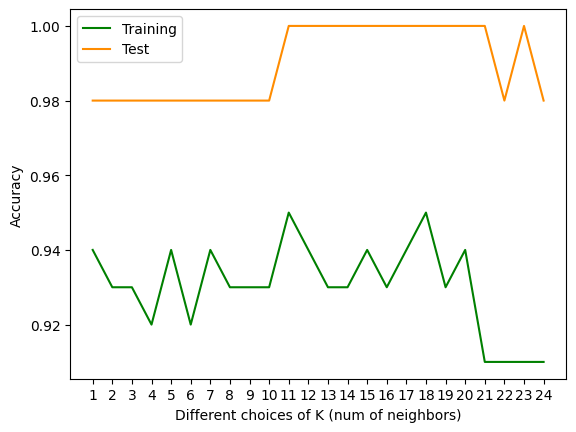

In [38]:
import matplotlib.pyplot as plt

X = k_list
y = training_acc
z = test_acc
plt.plot(X, y, color='green', label='Training')
plt.plot(X, z, color='darkorange', label='Test')
plt.xticks(range(min(X), max(X)+1))
plt.xlabel("Different choices of K (num of neighbors)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


## 2. Hyperparameter Optimization with K-fold Cross Validation

##### Implement 10-fold Cross Validation
* Apply _10_ different train-validation splits on the train data. Test data are excluded in hyperparameter optimization.
* Make predictions for _10_ different train-validation splits, and different _k_ values (_1_ to _N_).
* Calculate train and test accuracy for each setting.
* Compute the average values by different k values for comparison.

In [39]:
from sklearn.model_selection import KFold

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.33, random_state=42)

N = 29
k_list = np.arange(1,N+1)
training_acc = np.zeros(shape=(10,N))
test_acc = np.zeros(shape=(10,N))

kf = KFold(n_splits=10)
for i, (train_indices, test_indices) in enumerate(kf.split(train_features)):
    for k in k_list:
        iris_classifier = KNNClassifier()
        
        predictions = iris_classifier.knn_classifier(train_features=train_features[train_indices], test_features=train_features[test_indices], class_labels=train_labels[train_indices], num_neighbors=k)
        test_accuracy = np.mean(predictions == train_labels[test_indices])
        test_acc[i][k-1] = test_accuracy
        
        training_predictions = iris_classifier.predict_training_data(num_neighbors=k)
        training_accuracy = np.mean(training_predictions == train_labels[train_indices])
        training_acc[i][k-1] = training_accuracy
        

In [40]:
# Printing the average train accuracy for each k value
training_acc.mean(axis=0)

array([0.93777778, 0.92444444, 0.92888889, 0.92444444, 0.93777778,
       0.92666667, 0.93888889, 0.93333333, 0.93333333, 0.94111111,
       0.94555556, 0.93666667, 0.93777778, 0.93666667, 0.93888889,
       0.93666667, 0.93333333, 0.93      , 0.91555556, 0.91444444,
       0.91444444, 0.91777778, 0.92222222, 0.92555556, 0.93      ,
       0.91666667, 0.91888889, 0.90777778, 0.91111111])

In [41]:
# Printing the average test accuracy for each k value
test_acc.mean(axis=0)

array([0.94, 0.94, 0.94, 0.93, 0.94, 0.94, 0.93, 0.94, 0.93, 0.93, 0.94,
       0.93, 0.93, 0.92, 0.93, 0.93, 0.93, 0.92, 0.91, 0.92, 0.93, 0.92,
       0.93, 0.93, 0.91, 0.9 , 0.91, 0.9 , 0.9 ])

##### Plot the average train and test accuracy values for a range of different k values (10-fold Cross validation)

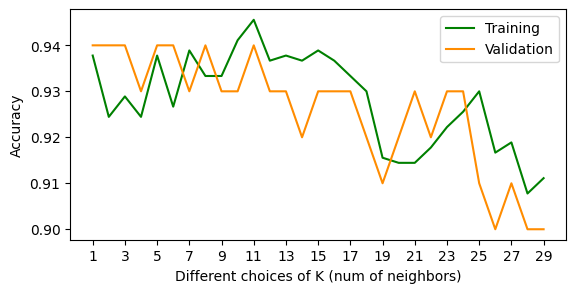

In [42]:
import matplotlib.pyplot as plt

X = k_list
y = training_acc.mean(axis=0)
z = test_acc.mean(axis=0)

plt.plot(X, y, color='green', label='Training')
plt.plot(X, z, color='darkorange', label='Validation')

plt.xticks(np.arange(1,N+1,2))

plt.xlabel("Different choices of K (num of neighbors)")
plt.ylabel("Accuracy")
plt.subplots_adjust(bottom=0.4)


plt.legend()
plt.show()

The optimal k (num of neighbors) value can be chosen among the best test performance. If there are equally performing values, then we can choose the one with best training performance.